**Ulkomaat matkojen lukumäärä esitettynä vuosittain 2012-2021**

**mallina käytetään K means klusterointia**


In [ ]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

df = pd.read_excel("YO_2_koko maa.xlsx")
df

,matkan suunta,kotipaikka,vuosi,ikä,matkojen lkm tuhansina
0,kotimaa,KOKO MAA,2012,15 -,5650
1,kotimaa,KOKO MAA,2012,25 -,17800
2,kotimaa,KOKO MAA,2012,65 -,3320
3,kotimaa,KOKO MAA,2013,15 -,5170
4,kotimaa,KOKO MAA,2013,25 -,17970
5,kotimaa,KOKO MAA,2013,65 -,3390
6,kotimaa,KOKO MAA,2014,15 -,5000
7,kotimaa,KOKO MAA,2014,25 -,16770
8,kotimaa,KOKO MAA,2014,65 -,3440
9,kotimaa,KOKO MAA,2015,15 -,4800


In [ ]:

print(df.dtypes)

matkan suunta             object
kotipaikka                object
vuosi                      int64
ikä                       object
matkojen lkm tuhansina     int64
dtype: object


In [ ]:

df.describe()

,vuosi,matkojen lkm tuhansina
count,60.00000,60.000000
mean,2016.50000,5307.500000
std,2.89652,5605.208723
min,2012.00000,150.000000
25%,2014.00000,1197.500000
50%,2016.50000,4080.000000
75%,2019.00000,5090.000000
max,2021.00000,17970.000000


In [ ]:
#valitaan vain ulkomaan matkailu df2 dataframeksi

df2 = df.iloc[30:,:]
df2.head()

,matkan suunta,kotipaikka,vuosi,ikä,matkojen lkm tuhansina
30,ulkomaat,KOKO MAA,2012,15 -,1130
31,ulkomaat,KOKO MAA,2012,25 -,5000
32,ulkomaat,KOKO MAA,2012,65 -,970
33,ulkomaat,KOKO MAA,2013,15 -,920
34,ulkomaat,KOKO MAA,2013,25 -,4860


In [ ]:
#poistetaan ikä-muuttujaa ja luodaan df3

df3 = df2.drop(columns = 'ikä')
df3.head()

,matkan suunta,kotipaikka,vuosi,matkojen lkm tuhansina
30,ulkomaat,KOKO MAA,2012,1130
31,ulkomaat,KOKO MAA,2012,5000
32,ulkomaat,KOKO MAA,2012,970
33,ulkomaat,KOKO MAA,2013,920
34,ulkomaat,KOKO MAA,2013,4860


In [ ]:
# df4 jossa vain vuosi ja matkojen lkm tuhansina - muuttujat

df4 = df3.iloc[:,2:]
df4.head()

,vuosi,matkojen lkm tuhansina
30,2012,1130
31,2012,5000
32,2012,970
33,2013,920
34,2013,4860


**Normalisoidaan vuosi ja matkojen lkm tuhansina -muuttujat, koska käytetään klusterointimallia.**

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df4 = scaler.fit_transform(df4)



In [ ]:
# muodostetaan uudestaan df4 dataframe

df4 = pd.DataFrame(df4, columns =['vuosi', 'matkojen lkm tuhansina'])
df4.head()

,vuosi,matkojen lkm tuhansina
0,0.000000,0.189189
1,0.000000,0.936293
2,0.000000,0.158301
3,0.111111,0.148649
4,0.111111,0.909266


In [ ]:

df4.describe()

,vuosi,matkojen lkm tuhansina
count,30.000000,30.000000
mean,0.500000,0.366088
std,0.324598,0.361437
min,0.000000,0.000000
25%,0.222222,0.151544
50%,0.500000,0.201737
75%,0.777778,0.738417
max,1.000000,1.000000


In [ ]:

X = df4
X.head()

,vuosi,matkojen lkm tuhansina
0,0.000000,0.189189
1,0.000000,0.936293
2,0.000000,0.158301
3,0.111111,0.148649
4,0.111111,0.909266


**Lasketaan Silhouette score, jolla saadaan klustereiden määrä.**

In [ ]:

# Silhouette score

from sklearn.metrics import silhouette_score

K = range(2, 10)

scores = [] #scoret sijoitetaan listaan

for k in K:

  kmeanModel = KMeans(n_clusters=k).fit(X)

  score = silhouette_score(X, kmeanModel.labels_, metric='euclidean')

  scores.append(score)

  print('k=',k,' silhouette ',score)

k= 2  silhouette  0.560851763400704
k= 3  silhouette  0.5819812464855209
k= 4  silhouette  0.5672497125205673
k= 5  silhouette  0.5162009144301526
k= 6  silhouette  0.5018707205196845
k= 7  silhouette  0.4728096802871775
k= 8  silhouette  0.454787368050366
k= 9  silhouette  0.4607289568382884


In [ ]:

scores

[0.560851763400704,
 0.5819812464855209,
 0.5672497125205673,
 0.5162009144301526,
 0.5018707205196845,
 0.4728096802871775,
 0.454787368050366,
 0.4607289568382884]

In [ ]:

import numpy as np

k_optimal = K[np.array(scores).argmax()]
k_optimal

3

**Silhouette score valitaan 3 klusteria, ja käytetään K-means klusterointimallia.**

In [ ]:

malli = KMeans(n_clusters=3)
malli.fit(X)

klusterit = malli.predict(X)
klusterit # eroteltu 3 klusteria toisistaan

array([2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:

# lisätään uusi muuttuja, klusteri

df4['klusteri'] = klusterit
df4.head()

,vuosi,matkojen lkm tuhansina,klusteri
0,0.000000,0.189189,2
1,0.000000,0.936293,0
2,0.000000,0.158301,2
3,0.111111,0.148649,2
4,0.111111,0.909266,0


**Piirretään kuvaaja, jossa matkojen lukumäärä (tuhansina) on klusteroitu vuosi-muuttujan perusteella 3 klusteriin.**

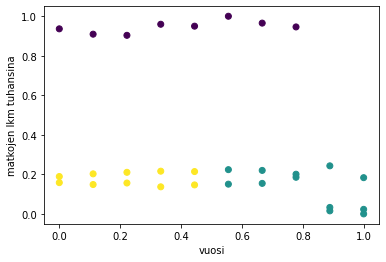

In [ ]:
#VUOSI X-AKSELILLA JA ULKOMAAN MATKOJEN LUKUMÄÄRÄ (TUHANSINA) Y-AKSELILLA

fig = plt.figure()
ax = fig.add_subplot()

#scatter plot
ax.scatter(X.iloc[:,0], X.iloc[:,1],c = klusterit)

ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])

plt.show()

***Kolme klusteria muodostui sen perusteella, että eniten ulkomaan matkoja tekivät ikäryhmä 25-64-vuotiaat ja vähemmän nuoret sekä seniorit. Ja lisäksi vuosien 2012-2016 ja 2017-2021 matkat jakautuivat kahteen erilliseen klusteriin.***

> ikäryhmässä 65-85 tehtiin ulkomaan matkoja ikäryhmää 15-25 enemmän